In [1]:
#manajemen dataframe
import pandas as pd 

#operasi aritmatika
import numpy as np 

#visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn


In [2]:
stunting = pd.read_csv('data_balita.csv')

stunting

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


# DATA UNDERSTANDING


In [3]:
stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
stunting.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [5]:
stunting['Status Gizi'].value_counts()

normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: Status Gizi, dtype: int64

In [6]:
stunting['Jenis Kelamin'].value_counts()

perempuan    61002
laki-laki    59997
Name: Jenis Kelamin, dtype: int64

# DATA PREPOCESSING

In [7]:
stunting.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [8]:
stunting.duplicated().sum()

81574

In [10]:
stunting1 = stunting.drop_duplicates(keep=False)
print('Result Data after duplicate removal :', stunting1)

Result Data after duplicate removal :         Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0                  0     laki-laki          44.591973           stunted
1                  0     laki-laki          56.705203            tinggi
2                  0     laki-laki          46.863358            normal
3                  0     laki-laki          47.508026            normal
4                  0     laki-laki          42.743494  severely stunted
...              ...           ...                ...               ...
120959            60     perempuan         100.700000            normal
120967            60     perempuan         113.700000            normal
120968            60     perempuan         107.500000            normal
120972            60     perempuan         127.600000            tinggi
120993            60     perempuan         116.100000            normal

[10491 rows x 4 columns]


In [11]:
print('data shape : ', stunting1.shape)

data shape :  (10491, 4)


In [12]:
stunting1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10491 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       10491 non-null  int64  
 1   Jenis Kelamin      10491 non-null  object 
 2   Tinggi Badan (cm)  10491 non-null  float64
 3   Status Gizi        10491 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 409.8+ KB


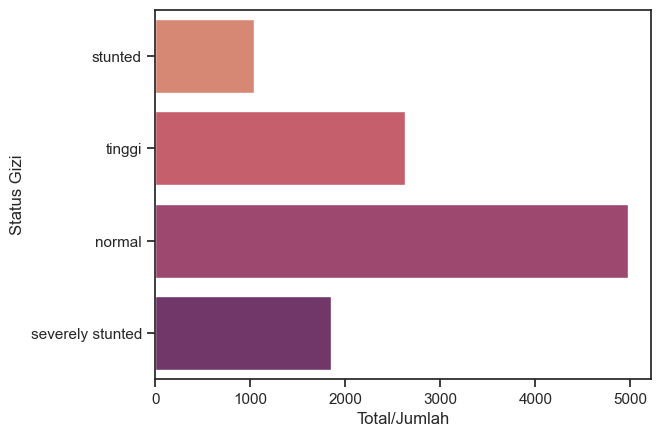

In [13]:
sns.set_theme(style='ticks')
sns.countplot(y= 'Status Gizi', data=stunting1, palette='flare')
plt.ylabel("Status Gizi")
plt.xlabel("Total/Jumlah")
plt.show()

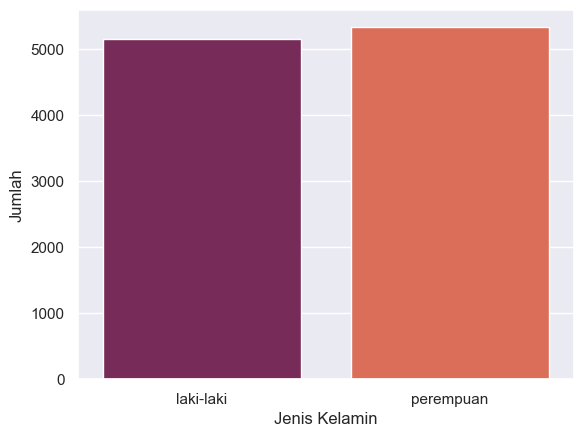

In [14]:
sns.set_theme(style='darkgrid')
sns.countplot(x= 'Jenis Kelamin', data=stunting1, palette='rocket')
plt.ylabel("Jumlah")
plt.xlabel("Jenis Kelamin")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()

stunting2 = stunting1.copy()
stunting2['Jenis Kelamin']=label_encoder.fit_transform(stunting2['Jenis Kelamin'])
stunting2['Status Gizi']=label_encoder.fit_transform(stunting2['Status Gizi'])

In [19]:
stunting2['Status Gizi'].value_counts()

0    4969
3    2633
1    1850
2    1039
Name: Status Gizi, dtype: int64

In [20]:
stunting2['Jenis Kelamin'].value_counts()

1    5336
0    5155
Name: Jenis Kelamin, dtype: int64

In [21]:
stunting2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10491 entries, 0 to 120993
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Umur (bulan)       10491 non-null  int64  
 1   Jenis Kelamin      10491 non-null  int32  
 2   Tinggi Badan (cm)  10491 non-null  float64
 3   Status Gizi        10491 non-null  int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 327.8 KB


In [22]:
x = stunting2.drop(columns = ['Status Gizi'])
y = stunting2['Status Gizi']

print("x : ", x.shape)
print("y : ", y.shape)

x :  (10491, 3)
y :  (10491,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Inisialisasi dan fit scaler pada data train
X_train_scaled = scaler.fit_transform(X_train)

# Standarisasi data test
X_test_scaled = scaler.transform(X_test)

In [30]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

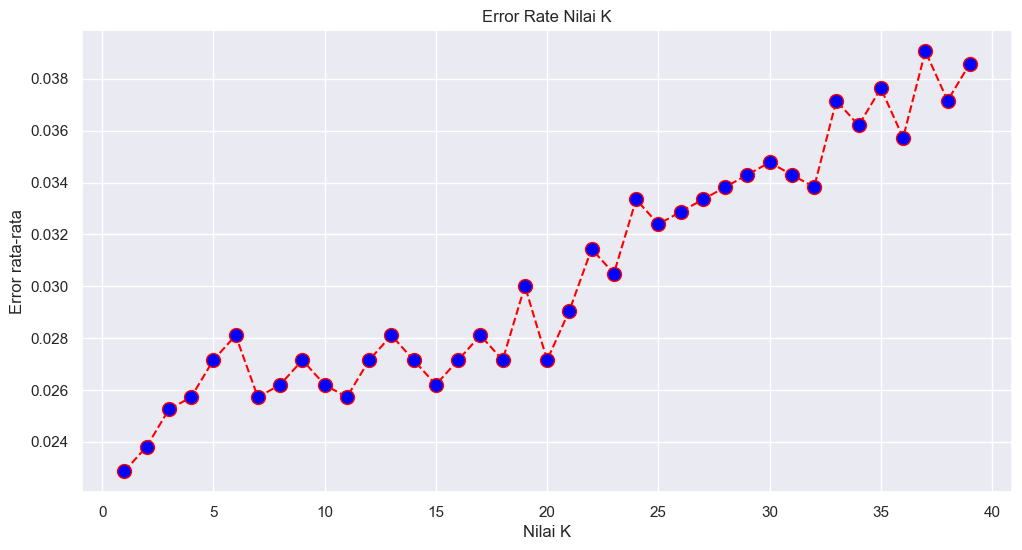

In [31]:

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')

# MODELLING


In [36]:
#mengukur performa model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#pemodelan KNN
from sklearn.neighbors import KNeighborsClassifier


In [51]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


In [52]:
KNN_acc = accuracy_score(y_pred, y_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Akurasi KNN : {:.2f}%".format(KNN_acc*100))

[[977   0   5   7]
 [  0 368   1   0]
 [ 16   5 171   0]
 [ 13   0   0 536]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       989
           1       0.99      1.00      0.99       369
           2       0.97      0.89      0.93       192
           3       0.99      0.98      0.98       549

    accuracy                           0.98      2099
   macro avg       0.98      0.96      0.97      2099
weighted avg       0.98      0.98      0.98      2099

Akurasi KNN : 97.76%


# TESTING

In [53]:
testing = {'Umur (bulan)' : [30],
           'Jenis Kelamin' : [1],    # 0 : laki-laki , 1 : Perempuan
           'Tinggi Badan (cm)' : [100]}

testing = pd.DataFrame(testing)
testing

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,30,1,100


In [54]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi Anak ini :")
print(pred_coba)

# 0 : normal
# 1 : severely stunted
# 2 : stunted
# 3 : Gizi tinggi/Sehat

Hasil Prediksi Anak ini :
[3]


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [25]:
#save model
import pickle

with open("model_knn", "wb") as model_file:
    pickle.dump((scaler, knn), model_file)

In [26]:
#load model
with open("model_knn", "rb") as model_file:
    scaler, loaded_model_knn = pickle.load(model_file)

In [27]:
feature_names = ['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']
testing = [[30,1,100]]
testing = pd.DataFrame(testing, columns= feature_names)
testing
print("knn :",loaded_model_knn.predict(testing))

# 0 : normal
# 1 : severely stunted
# 2 : stunted
# 3 : Gizi tinggi/Sehat